In [58]:
### Grading script code 
### You don't need to read this, proceed to the next cell
import sys
import functools
ipython = get_ipython()

def set_traceback(val):
    method_name = "showtraceback"
    setattr(
        ipython,
        method_name,
        functools.partial(
            getattr(ipython, method_name),
            exception_only=(not val)
        )
    )

class AnswerError(Exception):
  def __init__(self, message):
    pass

def exec_test(f, question):
    try:
        f()
        print(question + " Pass")
    except:
        set_traceback(False) # do not remove
        raise AnswerError(question + " Fail")

# Week 10 Problem Set

## Homeworks

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**HW0.** Do the following before starting the homework questions.

**Task 1.** Paste the following functions from your cohort sessions:
- `get_features_target()`
- `normalize_z()`
- `normalize_minmax()`
- `replace_target()`
- `split_data()`
- `prepare_feature()`
- `prepare_target()`
- `calc_log()`
- `compute_cost_logreg()`
- `gradient_descent_logreg()`
- `predict_norm()`
- `predict()`
- `confusion_matrix()`

In [60]:
def get_features_targets(df, feature_names, target_names):
    return pd.DataFrame(df.loc[:, feature_names]), pd.DataFrame(df.loc[:, target_names])

def normalize_z(df):
    mean = df.mean(axis=0)
    std = df.std(axis=0)
    return (df - mean)/std

def normalize_minmax(df):
    min = df.min(axis=0)
    max = df.max(axis=0)
    return (df - min)/(max-min)

def prepare_feature(df_feature):
    df_feature = df_feature.copy()
    # insert at pos 0, column name 'ones', 1s
    df_feature.insert(0, 'ones', 1)
    return df_feature.to_numpy()

def prepare_target(df_target):
    return df_target.to_numpy().reshape(len(df_target), 1)

def replace_target(df_target, target_name, map_vals):
    df_out = df_target.loc[:, target_name].apply(lambda x: map_vals[x])
    return pd.DataFrame(df_out)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    np.random.seed(random_state)
    indexes = df_feature.index
    indexes_test = np.random.choice(indexes, int(test_size * len(indexes)), replace=False)
    indexes_train = indexes.difference(indexes_test)
    df_feature_test, df_feature_train = df_feature.iloc[indexes_test, :], df_feature.iloc[indexes_train, :]

    df_target_test, df_target_train = df_target.iloc[indexes_test, :], df_target.iloc[indexes_train, :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test

def calc_log(X, beta):
    return 1/ (1 + np.exp(np.matmul(-X, beta)))

def compute_cost_logreg(beta, X, y):
    np.seterr(divide = 'ignore') 

    # m is the number of data points
    m = X.shape[0]
    J = - 1 / m * np.where(y == 1, y * np.log(calc_log(X, beta)), (1 - y) * np.log(1 - calc_log(X, beta)))

    np.seterr(divide = 'warn')
    return J[0, 0]

def gradient_descent_logreg(X, y, beta, alpha, num_iters):
    # m is the no. of data pts
    m = X.shape[0]
    J_storage = []
    for i in range(num_iters):
        beta = beta - alpha * 1 / m * X.T @ (calc_log(X, beta) - y)
        J_storage.append(compute_cost_logreg(beta, X, y))
    
    return beta, J_storage

def predict_norm(X, beta):
    p = calc_log(X, beta)
    return np.where(p >= 0.5, 1, 0)
    

def predict(df_feature, beta):
    df_feature = prepare_feature(normalize_z(df_feature))
    return predict_norm(df_feature, beta)
  
import itertools
def confusion_matrix(ytrue, ypred, labels):
    output = {i: 0 for i in itertools.product(labels, labels)}
    for t, p in zip(ytrue, ypred):
        output[(t[0], p[0])] += 1

    return output


**Task 2.** Load the Iris data set from `iris_data.csv` into a Data Frame. 

    

In [61]:
# read iris_data.csv
df = pd.read_csv('iris_data.csv')

###
### YOUR CODE HERE
###
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Task 3.** Do the following tasks.

- Read the following columns for the features: `'sepal_length', 'sepal_width', 'petal_length', 'petal_width'`.
- Read the column `species` for the target.
- Replace the `species` column with the following mapping:
    - `Iris-setosa`: `0`
    - `Iris-versicolor`: `1`
    - `Iris-virginica`: `2`

In [62]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}



# extract the features and the target
df_features, df_target = get_features_targets(df, columns, 'species')

# replace the target using the mapping
df_target = replace_target(df_target, 'species', mapping)

###
### YOUR CODE HERE
###


In [63]:
result = np.unique(df_target['species'], return_counts=True)
assert (result[0] == [0, 1, 2]).all()
assert (result[1] == [50, 50, 50]).all()

**HW1.** *One-vs-All target:* Write a function that takes in a target data frame and returns a new dataframe where the size of the column is the same as the number of category. The function makes use of `replace_target()` function to create one-vs-all target values. 

For example, if we have three categories of class, the columns of the returned data frame will be as follows:
- column target: this is the original target column
- column 0: the target with values of 0 will be set to 1 while the rest will be replaced with 0.
- column 1: the target with values of 1 will be set to 1 while the rest will be replaced with 0.
- column 2: the target with values of 2 will be set to 1 while while the rest will be replaced with 0.

In [64]:
def create_onevsall_columns(df_target, col):
    dfout = df_target.copy()
    column = dfout[col]
    unique_values = column.unique()
    for col in unique_values:
        dfout[col] = np.where(column == col, 1, 0)


    return dfout

In [65]:
df_targets = create_onevsall_columns(df_target, 'species')
print(df_targets)
result = np.unique(df_targets['species'], return_counts=True)
assert (result[0] == [0, 1, 2]).all()
assert (result[1] == [50, 50, 50]).all()
result = np.unique(df_targets[0], return_counts=True)
assert (result[0] == [0, 1]).all()
assert (result[1] == [100, 50]).all()
result = np.unique(df_targets[1], return_counts=True)
assert (result[0] == [0, 1]).all()
assert (result[1] == [100, 50]).all()
result = np.unique(df_targets[2], return_counts=True)
assert (result[0] == [0, 1]).all()
assert (result[1] == [100, 50]).all()

     species  0  1  2
0          0  1  0  0
1          0  1  0  0
2          0  1  0  0
3          0  1  0  0
4          0  1  0  0
..       ... .. .. ..
145        2  0  0  1
146        2  0  0  1
147        2  0  0  1
148        2  0  0  1
149        2  0  0  1

[150 rows x 4 columns]


**HW2.** *Multiple features and splitting of data set:* Do the following task in the code below:
- Read the following columns for the features: `sepal_length`,`sepal_width`, `petal_length`, `petal_width` normalize it using `normalize_z()`. 
- Read `species` as the target column and use `create_onevsall_columns()` to create the additional target columns to do multi class classification.
- Split the data set with 30% test size and `random_state = 100`.
- Normalize the training feature data set using `normalize_z()` function.
- Convert to numpy array both the target and the features using `prepare_feature()` and `prepare_target()` functions.
- Call `gradient_descent()` function to get the parameters using the training data set.

In [66]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}

# extract the features and the target
df_features, df_target = get_features_targets(df, columns, 'species')

# replace the target using the mapping
df_target = replace_target(df_target, 'species', mapping)

# create one vs all columns for the target
df_targets = create_onevsall_columns(df_target, 'species')

# split the data using random_state = 100 and 30% test size
df_features_train, df_features_test, df_targets_train, df_targets_test = split_data(df_features, df_targets, test_size=0.3, random_state=100)

# normalize the training feature
df_features_train_z = normalize_z(df_features_train)


###
### YOUR CODE HERE
###


In [67]:
assert df_features_train_z.shape == (105, 4)

assert np.isclose(df_features_train_z.min(), -2.52349).any()
assert np.isclose(df_features_train_z.max(), 2.73284).any()
assert np.isclose(df_features_train_z['sepal_width'].mean(), 0)
assert np.isclose(df_features_train_z['sepal_width'].std(), 1, atol=0.01)

assert (np.unique(df_targets_train['species']) == [0, 1, 2]).all()
assert (np.unique(df_targets_train[0]) == [0, 1]).all()
assert (np.unique(df_targets_train[1]) == [0, 1]).all()
assert (np.unique(df_targets_train[2]) == [0, 1]).all()


**HW3.** *Build Multi-class Model:* Write a function `build_model_multiclass()` which takes in the following arguments:
- `df_features`: which is a Pandas data framecontaining the features.
- `df_targets`: which is a Pandas data frame containing the target for one vs all classification. 
- `col_target`: the name of the column target in the original data frame which is also the key of the dictionary containing the original target numpy array.
- `iterations`: the number of iterations to perform the gradient descent. By default it is set to 1500.
- `alpha`: the learning rate in the gradient descent algorithm. By default it is set to 0.01.

The function should return a dictionary of dictionary. The output dictionary has the following key and values:
- key: the keys are the categories or the labels in the target.
- values: the values are another dictionary for that particular label. This dictionary has two keys: `beta` and `J_storage`, which gives the parameter value for that particular label and its cost minimization values at every iteration.

Hint:
- you need to call `prepare_feature()` and `prepare_target()` to change the Pandas data frame to Numpy arrays.
- in order to create a data frame instead of a series when accessing a column, use `df[[c]]` (will output data frame) instead of `df[c]` (will output series). 
- You need to use `normalize_minmax()` on your target before passing it on to `gradient_descent_logreg()` because the function logistic regression has the normalized value of 0 to 1 in the y axis.

In [94]:
def build_model_multiclass(df_features, df_targets, col_target, iterations=1500, alpha=0.01):
    output = {}
    feature = prepare_feature(df_features)
    targets_columns = df_targets.columns
    for col in targets_columns:
        if col == col_target:
            continue
        curr_target = prepare_target(normalize_minmax(df_targets[col]))
        output[col] = {}
        beta = np.zeros((len(targets_columns)+1, 1))
        output[col]['beta'], output[col]['J_storage'] = gradient_descent_logreg(feature, curr_target, beta, alpha, iterations)
    
    return output
    

In [95]:
output = build_model_multiclass(df_features_train_z, df_targets_train, 'species')

assert isinstance(output, dict)
expected = np.array([[ -1.0198841], [ -0.69883077], [  1.0774116], [-1.17170999], [-1.12846826]])
assert np.isclose(output[0]['beta'], expected).all()
expected = np.array([[ -0.63304937], [ 0.11684857], [-1.15346071], [ 0.18746937], [-0.14534827 ]])
assert np.isclose(output[1]['beta'], expected).all()
expected = np.array([[-1.31740148 ], [0.42271871], [0.18526839], [ 0.8831822], [1.17929455]])
assert np.isclose(output[2]['beta'], expected).all()

class model = 0 [[-1.0198841 ]
 [-0.69883077]
 [ 1.0774116 ]
 [-1.17170999]
 [-1.12846826]]
class model = 1 [[-0.63304937]
 [ 0.11684857]
 [-1.15346071]
 [ 0.18746937]
 [-0.14534827]]
class model = 2 [[-1.31740148]
 [ 0.42271871]
 [ 0.18526839]
 [ 0.8831822 ]
 [ 1.17929455]]


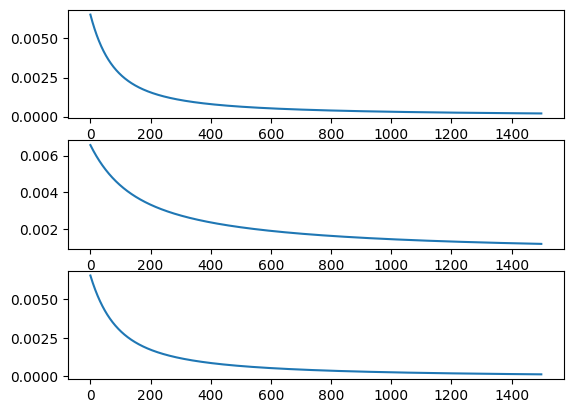

In [96]:
fig, axes = plt.subplots(len(output), 1)
idx = 0
for c in output:
    print(f'class model = {c:}', output[c]['beta'])
    axes[idx].plot(output[c]['J_storage'])
    idx += 1

**HW4.** *Predict Multi-class:* Write a function `predict_multiclass()` that takes in the data frame for the features and the parameters for the multi-class classification and return a Numpy array for the predicted target.

Recall that you need to do the following steps:
- Normalize the features and change to numpy array
- For each of the class, calculate the probability by using `log_regression()` function.
- For each record, find the class that gives the maximum probability.
- Returns a Numpy array with the predicted target values

You can use the following function in your code:
- `np.argmax()` to find the column name with the maximum value
- `df.apply(func, axis=1)`: which is to apply some function on a particular axis. Setting axis=1 means that the function is to be applied accross the columns of the data frame instead of the index or the rows. 

In [264]:
def predict_multiclass(df_features, multi_beta):
    features = prepare_feature(normalize_z(df_features))
    array = []
    for key in multi_beta.keys():
        array.append(calc_log(features, multi_beta[key]['beta']))
    array = np.concatenate(array, axis=1)
    array = np.array([[arr.argmax()] for arr in array])
    return array

In [265]:
pred = predict_multiclass(df_features_test, output)

assert isinstance(pred, np.ndarray)
assert pred.shape == (45, 1)
assert pred.min() == 0
assert pred.max() == 2
assert np.median(pred) == 1

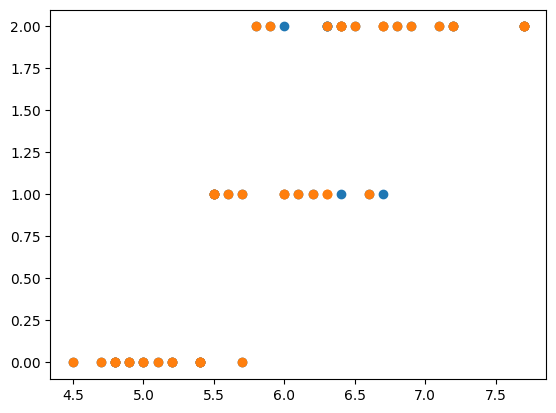

In [266]:
plt.scatter(df_features_test['sepal_length'], df_targets_test['species'])
plt.scatter(df_features_test['sepal_length'], pred)

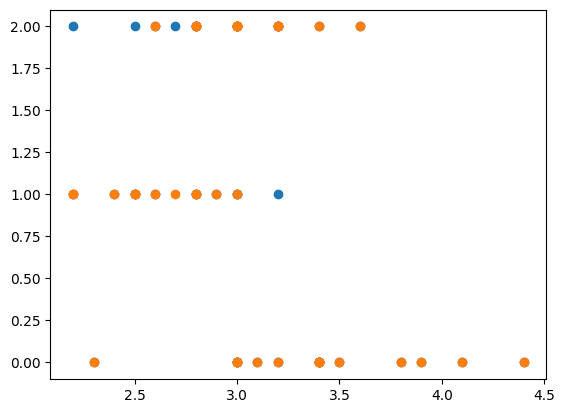

In [267]:
plt.scatter(df_features_test['sepal_width'], df_targets_test['species'])
plt.scatter(df_features_test['sepal_width'], pred)

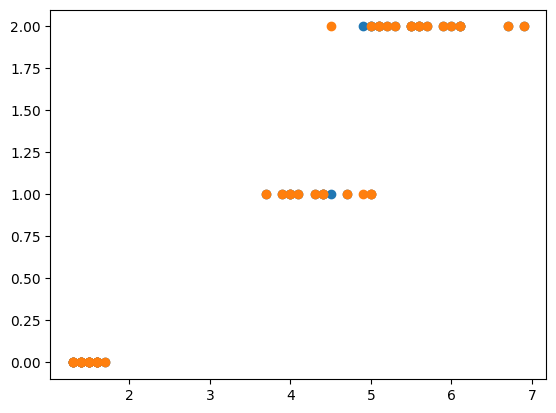

In [268]:
plt.scatter(df_features_test['petal_length'], df_targets_test['species'])
plt.scatter(df_features_test['petal_length'], pred)

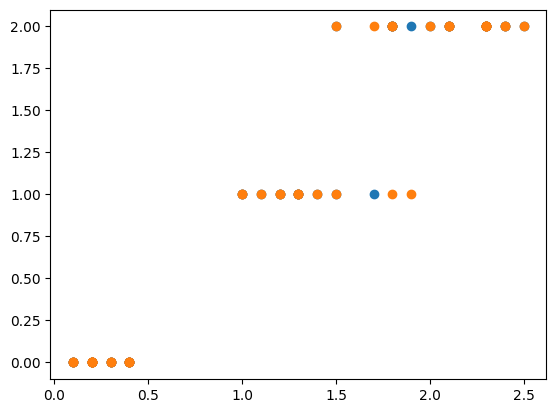

In [269]:
plt.scatter(df_features_test['petal_width'], df_targets_test['species'])
plt.scatter(df_features_test['petal_width'], pred)

**HW5.** *Confusion Matrix:* Write a function to calculate the confusion matrix for multi-class label. If you write the solution in the Cohort session properly, the solution will be the same as in the Cohort session.

Make sure that you can output a dictionary where the keys are all the combinations of all the classes: `(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)`.

In [271]:
import itertools
def confusion_matrix(ytrue, ypred, labels):
    output = {i: 0 for i in itertools.product(labels, labels)}
    for t, p in zip(ytrue, ypred):
        output[(t[0], p[0])] += 1

    return output

In [272]:
cm = confusion_matrix(df_targets_test.values, pred, [0, 1, 2])
print(cm)
assert cm == {(0, 0): 16, (0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 1): 9, (1, 2): 2, (2, 0): 0, (2, 1): 3, (2, 2): 15}

{(0, 0): 16, (0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 1): 9, (1, 2): 2, (2, 0): 0, (2, 1): 3, (2, 2): 15}


**HW6.** *Metrics:* Write a function `calc_accuracy()` that takes in a Confusion Matrix array and output a dictionary with the following keys and values:
- `accuracy`: total number of correct predictions / total number of records
- `sensitivity`: total correct positive cases / total positive cases
- `precision`: total  of correct positive cases / total predicted positive cases

For multiple classes, we can also calculate *sensitivity* and *precision* for each of the class. For example, to calculate the sensitivity for class *i*, we use:

$$\text{sensitivity}_i = \frac{M_{ii}}{\sum_j{M_{ij}}}$$

This means that we get the value at row *i* and columnn *i* which is the total correct case for class *i* and the sum over all the columns in row *i* which is the total cases for class *i*. 

Similarly, we can calculate the precision for class *i* using:

$$\text{precision}_i = \frac{M_{ii}}{\sum_j{M_{ji}}}$$

**Notice that the indices are swapped for the denominator**. For precision, we instead of summing over all the columns, we sum over all the rows in column *i* which is the total cases when class *i* is *predicted*.

The output is a dictionary with one of the keys called `accuracy` and the rest of the keys are the label for the different classes, i.e. 0, 1, and 2 in our example here. The value for `accuracy` key is a float. On the other hand, the values for the other label keys is another dictionary that has `sensitivity` and `precision` as the keys.

In [275]:
def calc_accuracy(cm, labels):
    output = {'accuracy': 0}
    for l in labels:
        output[l] = {}
        total_pos = 0
        total_pred_pos = 0
        for j in labels:
            total_pos += cm[(l, j)]
            total_pred_pos += cm[(j, l)]

        output[l]['sensitivity'] = cm[(l, l)] / total_pos
        output[l]['precision'] = cm[(l, l)]
    return output

In [276]:
metrics = calc_accuracy(cm, [0,1,2])
print(metrics)
assert np.isclose(metrics['accuracy'], 0.88888)
assert metrics[0] == {'sensitivity': 1.0, 'precision': 1.0}
assert np.isclose(metrics[0]['sensitivity'], 1.0)
assert np.isclose(metrics[0]['precision'], 1.0)
assert np.isclose(metrics[1]['sensitivity'], 0.8181818)
assert np.isclose(metrics[1]['precision'], 0.75)
assert np.isclose(metrics[2]['sensitivity'], 0.833333)
assert np.isclose(metrics[2]['precision'], 0.88235)


{(0, 0): 16, (0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 1): 9, (1, 2): 2, (2, 0): 0, (2, 1): 3, (2, 2): 15}
{'accuracy': 0, 0: {}, 1: {}, 2: {}}


AssertionError: 

**HW7.** *Optional:* Redo the above tasks using Scikit Learn libraries. You will need to use the following:
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

You can refer to the followign discussion on the different minimization solver for `LogisticRegression()` class.
- [Stack overflow - logistic regression python solvers' defintions](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}

# get the features and the columns
df_features = None

# replace target values with integers using the mapping
df_target = None


###
### YOUR CODE HERE
###


In [ ]:
# split data set using random_state = 100 and 30% test size
df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None

# change feature to numpy array and append column of 1s
feature = None

# change target to numpy array
target = None

###
### YOUR CODE HERE
###


In [ ]:
# create LogisticRegression object instance
# set solver to 'newton-cg' and multi_class to 'auto'
model = None

# build model
pass

# get predicted value
pred = None

###
### YOUR CODE HERE
###


In [ ]:
# calculate confusion matrix
cm = None

###
### YOUR CODE HERE
###
print(cm)


In [ ]:
expected = np.array([[16,  0,  0], [ 0, 11,  0], [ 0,  1, 17]])
assert (cm == expected).all()

In [ ]:
plt.scatter(df_features_test["sepal_width"], df_target_test)
plt.scatter(df_features_test["sepal_width"], pred)

In [ ]:
plt.scatter(df_features_test["sepal_length"], df_target_test)
plt.scatter(df_features_test["sepal_length"], pred)

In [ ]:
plt.scatter(df_features_test["petal_width"], df_target_test)
plt.scatter(df_features_test["petal_width"], pred)

In [ ]:
plt.scatter(df_features_test["petal_length"], df_target_test)
plt.scatter(df_features_test["petal_length"], pred)